In [197]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import check_grad

In [198]:
liver_data = pd.read_csv('../data/indian_liver_patient.csv')

liver_data.shape

Convert gender variable to numeric code: 0 = female, 1 = male

In [200]:
# changing gender to 0, 1

liver_data['Gender'] = liver_data['Gender'].astype('category')
liver_data['Gender'] = liver_data['Gender'].cat.codes

# converting all variables to floats

liver_data = liver_data.astype('float')

# removing observations with missing data

liver_data = liver_data.dropna()

liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [201]:
X = np.array(liver_data)[:, 0:10]

y = np.array(liver_data)[:, 10].reshape(X.shape[0],1) - 1

Implement optimization algorithm for binary classification of liver dieseae (1:+/ 0:-)

In [202]:
def sigmoid(X, c):
    return 1/(1+np.exp(-X.dot(c)))


def logistic_obj(X,c,y):
    
    # c dx1 vector of weights
    # X nxd matrix of data values
    # y nx1 vector of labels
    
    obj_value = (-1/X.shape[0]) * np.sum(y*np.log(sigmoid(X, c)) + (1 - y)*np.log(1 - sigmoid(X, c)))
    
    return obj_value

def logistic_grad(X,c,y):
    
    return (1/X.shape[0]) * np.dot(X.T, sigmoid(X, c) - y)

def logistic_sgd(X,c,y):
    
    (n,d) = X.shape
    
    idx = np.random.randint(n)
    
    x = X[idx, :].reshape(1, d)
    
    z = np.dot(x.T, sigmoid(x, c) - y)

    return z.T

Check gradients

In [217]:
x0 = np.array([50., 1., 0.5, 5.,400.,25.,8.,7.2,3.2,0.8]).reshape(10,1)
x1 = np.array([54., 1., 0.3, 5.5,200.,23.,7.,7.4,3.1,0.5]).reshape(10,1)


#print("Gradient check:",check_grad(logistic_obj(c = c, y = 1), logistic_grad(c = c, y= 1), [x0, x1]), "\n\n")

[x0, x1]

[array([[ 50. ],
        [  1. ],
        [  0.5],
        [  5. ],
        [400. ],
        [ 25. ],
        [  8. ],
        [  7.2],
        [  3.2],
        [  0.8]]), array([[ 54. ],
        [  1. ],
        [  0.3],
        [  5.5],
        [200. ],
        [ 23. ],
        [  7. ],
        [  7.4],
        [  3.1],
        [  0.5]])]

Initialize w, eta, iterations

[[-0.01173964]
 [ 0.0469963 ]
 [-0.01779599]
 [-0.42932142]
 [-0.00090457]
 [-0.00976272]
 [-0.00289527]
 [-0.09418426]
 [ 0.327658  ]
 [ 0.32277057]]


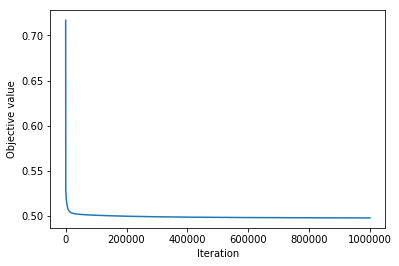

In [246]:
eta = 0.0001

iterations = 1000000

c = np.zeros((10,1))

# We will use the following vector to keep track of objective values
objective_values = np.zeros((iterations,1))

for i in range(iterations):
    
    c = c - eta * logistic_grad(X,c,y)
    
    # To do:  store current objective value
    objective_values[i] = logistic_obj(X,c,y)
    
    

# Plot the objective as a function of the iteration
plt.plot(objective_values)
plt.xlabel('Iteration')
plt.ylabel('Objective value')

print(c)

In [249]:
from sklearn.metrics import confusion_matrix

confusion_matrix(sigmoid(X, c) > 0.5, y == 1)


array([[387, 137],
       [ 27,  28]])